# Notebook E-tivity 3 CE4021 Task 1

Student name: Zheng Hanming

Student ID: 21225621

<hr style=\"border:2px solid gray\"> </hr>

## Imports

In [153]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

 If you believe required imports are missing, please contact your moderator.

<hr style=\"border:2px solid gray\"> </hr>

## Task 1

#### Option Dice: Rolling two 6-sided fair dice with the aim of determining the probability that the sum of the two dice is less than 3 or more than 10.

#### Discrete Uniform Distribution
This experiment involves rolling two fair 6-sided dice.<br>
Each roll is independent of each other and there are 6 equally probable outcome for each roll {1, 2, 3, 4, 5, 6}.<br>
There are 36 total possible outcomes for the 2 dice rolls and probability of each outcome is 1/36.

Our goal is to determine the probability of the sum of the two rolls which is < 3 or > 10.<br>
Possible Outcomes: 6 x 6 = 36<br>
< 3:: 1 + 1<br>
\> 10:: 5 + 6, 6 + 5, 6 + 6

We have 4 outcomes that fufills our requirement and there are a total of 36 outcomes for 2 dice rolls. Therefore the probability of getting a sum less than 3 and more than 10 is 4/36 or 1/9 or 0.11111.<br>
*-Ans: P(X<3, X>10) = 4/36 = 1/9 = 0.111111*

#### Random Variable(Discrete)
We map our random variable X to discrete value being the sum of two dice rolls<br>
x | P(X = x)<br>
2 | 1/36 => 1+1<br>
3 | 2/36 => 1+2, 2+1<br>
4 | 3/36 => 1+3, 2+2, 3+1<br>
5 | 4/36 => 1+4, 2+3, 3+2, 4+1<br>
6 | 5/36 => 1+5, 2+4, 3+3, 4+2, 5+1<br>
7 | 6/36 => 1+6, 2+5, 3+4, 4+3, 5+2, 6+1<br>
8 | 5/36 => 2+6, 3+5, 4+4, 5+3, 6+2<br>
9 | 4/36 => 3+6, 4+5, 5+4, 6+3<br>
10 | 3/36 => 4+6, 5+5, 6+4<br>
11 | 2/36 => 5+6, 6+5<br>
12 | 1/36 => 6+6

#### Expected Value(Mean)
E(X) <br>
= (2 x 1 + 3 x 2 + 4 x 3 + 5 x 4 + 6 x 5 + 7 x 6 + 8 x 5 + 9 x 4 + 10 x 3 + 11 x 2 + 12 x 1)/36<br>
= 7

E(X1 + X2) <br>
= E(X1) + E(X2)<br>
= E(X) x 2<br>
= (1 + 2 + 3 + 4 + 5 + 6) / 6 x 2<br>
= 3.5 x 2<br>
= 7

E(X) = 3.5   <= from above

*-Ans: E(X1 + X2) = 7*

#### Standard Deviation
Var(X)<br>
= (Σ|x - μ|^2)/N<br>
= ((2-7)^2 + 2x(3-7)^2 + 3x(4-7)^2 + 4x(5-7)^2 + 5x(6-7)^2 + 6x(7-7)^2 + 5x(8-7)^2 + 4x(9-7)^2 + 3x(10-7)^2 + 2x(11-7)^2 + (12-7)^2) / 36<br>
= 5.83333333333


Var(X1 + X2) = Var(X1) x 2<br>
= (Σ|x - μ|^2)/N x 2<br>
= ((1-3.5)^2 + (2-3.5)^2 + (3-3.5)^2 + (4-3.5)^2 + (5-3.5)^2 + (6-3.5)^2) / 6 x 2
= 5.83333333333

sd = Var(X1 + X2)^0.5<br>
= 5.83333333333^0.5<br>
= 2.4152294577

*-Ans: SD(X1 + X2) = 2.4152294577*

In [154]:
# Write Python code to simulate the experiment. The code should run the experiment a sufficient number of times such that you can experimentally approximate the following:
# The expected value of your random variable.
# The standard deviation of your random variable.

def perform_dice_rolls(element_count=0):
    """
    Given the number of trials, perform the dice rolls and provide result for the experiment

    arguments:
        element_count: number of trials
    return:
        dictionary of 
        'rolls': results of the rolls
        'probability': probability of the sum of each 2 dice rolls to be < 3 or > 10
        'expected_value': expected value (mean) from the dice rolls
        'sd': standard deviation of the rolls
    """
    rolls = [random.randint(1, 6) + random.randint(1, 6)
             for _ in range(element_count)]

    # find the probability of x<3 or x>10 - calculated result P(X<3, X>10) = 1/9 or 0.11111
    count_less3_more10 = sum(map(lambda x: x < 3 or x > 10, rolls))
    p_less3_more10 = count_less3_more10 / element_count

    # find the expected value (mean) of X - calculated E(X1 + X2) = 7
    expected_value = np.average(rolls)

    # find the standard deviation of the expected value - calculated σ = 2.4152294577
    rolls_with_square_diff = [(x - expected_value)**2 for x in rolls]
    variance = sum(rolls_with_square_diff)/element_count
    sd = variance**0.5

    return {'rolls': rolls, 'probability': p_less3_more10, 'expected_value': expected_value, 'sd': sd}


def plot_results(rolls):
    """
    Plot the rolls into a bar chart
    arguments:
        'rolls': results of the rolls
    return:
        nothing
    """
    # Plot the distribution found in your simulated experiment with an appropriate number of 'bins'
    bars_counts = (np.unique(rolls, return_counts=True))
    bars = bars_counts[0]
    counts = bars_counts[1]
    weight = counts / total_element
    colours = ['orange' if x < 3 or x > 10 else 'blue' for x in bars]

    plt.bar(bars, weight, color=colours)
    plt.xlabel('Sum of 2 Dice Rolls')
    plt.xticks(bars)
    plt.ylabel("Probability P(X1 + X2)")
    plt.title(f'2 Dice Rolls(Sample Size: {total_element})')
    plt.show()


def perform_dice_rolls_and_evaluate_result(element_count=0):
    print(f'======= Perform {element_count} Rolls To Evaluate Results =======')
    calculated_probability = 0.111111
    calculated_expected_value = 7
    calculated_sd = 2.4152294577
    result = perform_dice_rolls(element_count)
    plot_results(result['rolls'])
    probability_diff = round(abs((result["probability"] - calculated_probability)/calculated_probability*100),2)
    expected_value_diff = round(abs((result["expected_value"] - calculated_expected_value)/calculated_expected_value*100),2)
    expcted_sd_diff = round(abs((result["sd"] - calculated_sd)/calculated_sd*100),2)
    print(
        f'Calculated P(X<3, X>10) = 0.111111 || Experimented P(X<3, X>10) = {result["probability"]} | Difference: {probability_diff}%')
    print(
        f'Calculated E(X1 + X2) = 7 || Experimented E(X1 + X2) = {result["expected_value"]} | Difference: {expected_value_diff}%')
    print(
        f'Calculated σ = 2.4152294577 || Experimented σ = {result["sd"]} | Difference: {expcted_sd_diff}%')
    print('')
    print('')


======= Perform 10 Rolls To Evaluate Results =======


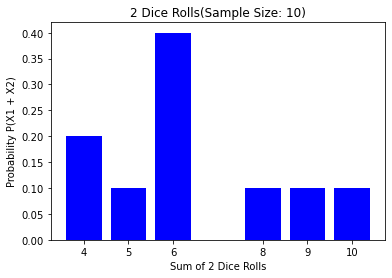

Calculated P(X<3, X>10) = 0.111111 || Experimented P(X<3, X>10) = 0.0 | Difference: 100.0%
Calculated E(X1 + X2) = 7 || Experimented E(X1 + X2) = 6.4 | Difference: 8.57%
Calculated σ = 2.4152294577 || Experimented σ = 1.9078784028338913 | Difference: 21.01%




In [155]:
total_element = 10
perform_dice_rolls_and_evaluate_result(total_element)

======= Perform 100 Rolls To Evaluate Results =======


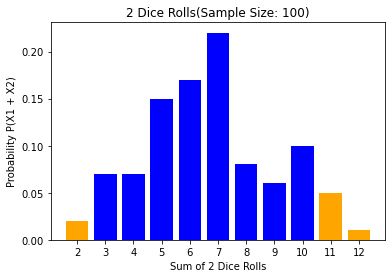

Calculated P(X<3, X>10) = 0.111111 || Experimented P(X<3, X>10) = 0.08 | Difference: 28.0%
Calculated E(X1 + X2) = 7 || Experimented E(X1 + X2) = 6.69 | Difference: 4.43%
Calculated σ = 2.4152294577 || Experimented σ = 2.2790129442370426 | Difference: 5.64%




In [156]:
total_element = 100
perform_dice_rolls_and_evaluate_result(total_element)

======= Perform 1000 Rolls To Evaluate Results =======


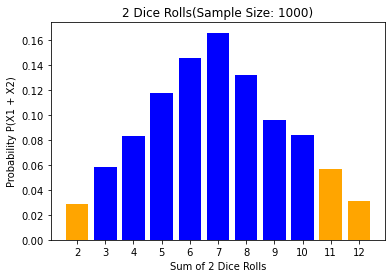

Calculated P(X<3, X>10) = 0.111111 || Experimented P(X<3, X>10) = 0.117 | Difference: 5.3%
Calculated E(X1 + X2) = 7 || Experimented E(X1 + X2) = 6.951 | Difference: 0.7%
Calculated σ = 2.4152294577 || Experimented σ = 2.4442992860940604 | Difference: 1.2%




In [157]:
total_element = 1_000
perform_dice_rolls_and_evaluate_result(total_element)

======= Perform 10000 Rolls To Evaluate Results =======


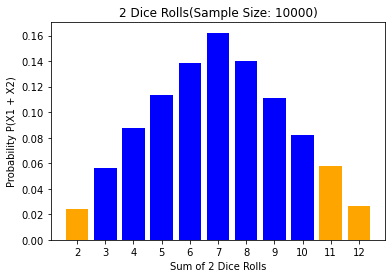

Calculated P(X<3, X>10) = 0.111111 || Experimented P(X<3, X>10) = 0.1087 | Difference: 2.17%
Calculated E(X1 + X2) = 7 || Experimented E(X1 + X2) = 6.9977 | Difference: 0.03%
Calculated σ = 2.4152294577 || Experimented σ = 2.4083801008145795 | Difference: 0.28%




In [158]:
total_element = 10_000
perform_dice_rolls_and_evaluate_result(total_element)

======= Perform 100000 Rolls To Evaluate Results =======


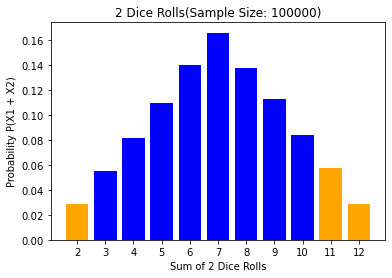

Calculated P(X<3, X>10) = 0.111111 || Experimented P(X<3, X>10) = 0.11443 | Difference: 2.99%
Calculated E(X1 + X2) = 7 || Experimented E(X1 + X2) = 7.01818 | Difference: 0.26%
Calculated σ = 2.4152294577 || Experimented σ = 2.4245142786957445 | Difference: 0.38%




In [159]:
total_element = 100_000
perform_dice_rolls_and_evaluate_result(total_element)

<hr style=\"border:2px solid gray\"> </hr>

## Reflection

In the task, I have learnt how to how to calculate expected value, variance and starndard deviation.

There are three main method in code.<br>
1. perform the dice rolls to get the mean, probability(x<3, x>10) and standard deviation.
2. plot results based on the dice rolls
3. calls method 1 and 2 to perform a full round of rolling dice and ploting graph

In this task, I have performed the dice rolling for different sample sizes.<br>
Dice roll of 10, 100, 1000, 10000, 100000 times. As the number of dice roll increases, we can observe that the distribution approaches normal distribution.<br>
As the sample size increases, P(X<3, x>10), E(X) and σ approaches our calculated value.<br>
And the result(calculated vs experimented) wont improve any further once sample size increases above 10000.<br>
